In [538]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [539]:
octo = pd.read_csv("Power-Networks-LCL-June2015(withAcornGps)v2_1.csv")

In [540]:
feb = pd.read_csv("Power-Networks-LCL-June2015(withAcornGps)v2_7.csv")

In [541]:
octo.DateTime = pd.to_datetime(octo.DateTime)
feb.DateTime = pd.to_datetime(feb.DateTime)

## Numerize the economic category

In [542]:
dic = {'Affluent': '1' , 'Adversity': "2", 'Comfortable': "3", 'ACORN-U': "4"}

In [543]:
octo.Acorn_grouped = octo.Acorn_grouped.map(dic)
feb.Acorn_grouped = feb.Acorn_grouped.map(dic)

In [544]:
label_octo = octo.iloc[:, (0, -1)].drop_duplicates()
label_feb = feb.iloc[:, (0, -1)].drop_duplicates()

In [545]:
label_feb

,LCLid,Acorn_grouped
0,MAC000200,3
36472,MAC000201,3
75936,MAC000202,2
102764,MAC000203,1
142207,MAC000204,2
166863,MAC000205,1
206320,MAC000206,3
245772,MAC000207,2
285208,MAC000208,2
324048,MAC000209,3


In [546]:
octo = octo[octo.DateTime.dt.month == 10] # cut from 10-22 to 10:31

In [547]:
feb = feb[feb.DateTime.dt.month == 2] # cut from 10-22 to 10:31

In [548]:
octo.iloc[:,3] = octo.iloc[:,3].astype(float)
feb.iloc[:,3] = feb.iloc[:,3].astype(float)

In [549]:
octo_p = octo.pivot_table(values='KWH/hh (per half hour) ', index = "DateTime", columns = "LCLid" )
feb_p = feb.pivot_table(values='KWH/hh (per half hour) ', index = "DateTime", columns = "LCLid" )

In [550]:
octo_p = octo_p.dropna(axis = 1, how = "any")
feb_p = feb_p.dropna(axis = 1, how = "any")
feb_p = feb_p.T
octo_p = octo_p.T

In [551]:
octo_p = octo_p.reset_index()
feb_p = feb_p.reset_index()

In [556]:
octo_p = octo_p.merge(label_octo, on = "LCLid", how = 'inner')
feb_p = feb_p.merge(label_feb, on = "LCLid", how = 'inner')

In [557]:
feb_p

DateTime,LCLid,2012-02-01 00:00:00,2012-02-01 00:30:00,2012-02-01 01:00:00,2012-02-01 01:30:00,2012-02-01 02:00:00,2012-02-01 02:30:00,2012-02-01 03:00:00,2012-02-01 03:30:00,2012-02-01 04:00:00,...,2014-02-27 20:00:00,2014-02-27 20:30:00,2014-02-27 21:00:00,2014-02-27 21:30:00,2014-02-27 22:00:00,2014-02-27 22:30:00,2014-02-27 23:00:00,2014-02-27 23:30:00,2014-02-28 00:00:00,Acorn_grouped
0,MAC000201,0.128,0.104,0.078,0.058,0.075,0.060,0.062,0.071,0.054,...,0.212,0.121,0.118,0.174,0.161,0.122,0.200,0.120,0.083,3
1,MAC000205,0.282,0.190,0.168,0.173,0.172,0.277,0.163,0.172,0.088,...,0.337,0.732,1.269,0.432,0.316,0.374,0.275,0.236,0.256,1
2,MAC000206,0.140,0.054,0.066,0.067,0.056,0.056,0.066,0.065,0.048,...,0.311,0.368,0.254,0.337,0.354,0.306,0.284,0.313,0.061,3
3,MAC000209,0.015,0.039,0.004,0.017,0.066,0.027,0.001,0.044,0.001,...,0.115,0.098,0.114,0.064,0.072,0.015,0.022,0.042,0.007,3
4,MAC000214,0.038,0.037,0.068,0.087,0.045,0.046,0.062,0.098,0.054,...,0.200,0.400,0.214,0.184,0.380,0.190,0.239,0.134,0.081,1
5,MAC000216,0.767,0.784,0.770,0.781,0.755,0.790,0.768,0.726,0.768,...,0.599,0.588,0.566,0.767,0.548,0.674,0.639,0.520,0.502,2
6,MAC000218,0.376,0.282,1.204,0.313,0.221,0.179,0.107,0.155,0.105,...,1.828,1.832,0.948,0.287,0.625,0.367,0.423,0.559,0.415,1
7,MAC000221,0.115,0.087,0.111,0.082,0.126,0.077,0.112,0.089,0.118,...,0.551,0.540,0.699,0.708,0.780,0.685,0.693,0.739,0.592,1


In [558]:
octo_p 

DateTime,LCLid,2012-10-01 00:00:00,2012-10-01 00:30:00,2012-10-01 01:00:00,2012-10-01 01:30:00,2012-10-01 02:00:00,2012-10-01 02:30:00,2012-10-01 03:00:00,2012-10-01 03:30:00,2012-10-01 04:00:00,...,2013-10-31 19:30:00,2013-10-31 20:00:00,2013-10-31 20:30:00,2013-10-31 21:00:00,2013-10-31 21:30:00,2013-10-31 22:00:00,2013-10-31 22:30:00,2013-10-31 23:00:00,2013-10-31 23:30:00,Acorn_grouped
0,MAC000003,0.105,1.469,1.416,0.491,0.139,0.519,0.124,0.340,0.191,...,0.138,0.133,0.122,0.125,0.107,0.129,0.305,0.143,0.103,2
1,MAC000004,0.000,0.000,0.182,0.000,0.000,0.000,0.000,0.000,0.164,...,0.000,0.000,0.195,0.000,0.000,0.000,0.000,0.170,0.000,1
2,MAC000006,0.029,0.038,0.014,0.044,0.022,0.016,0.051,0.015,0.030,...,0.075,0.067,0.052,0.089,0.052,0.064,0.083,0.057,0.086,2
3,MAC000007,0.062,0.077,0.040,0.073,0.036,0.044,0.065,0.080,0.069,...,0.215,0.289,0.311,0.226,0.193,0.318,0.242,0.220,0.095,3
4,MAC000009,0.078,0.084,0.073,0.057,0.088,0.089,0.046,0.029,0.032,...,0.208,0.168,0.168,0.178,0.130,0.155,0.346,0.131,0.142,2
5,MAC000013,0.113,0.086,0.076,0.098,0.122,0.142,0.087,0.069,0.098,...,0.128,0.159,0.119,0.123,0.142,0.132,0.087,0.086,0.158,2
6,MAC000018,0.448,0.306,0.224,0.225,0.256,0.230,0.132,0.126,0.125,...,0.133,0.147,0.134,0.134,0.132,0.132,0.134,0.132,0.133,1
7,MAC000019,0.033,0.053,0.025,0.107,0.089,0.084,0.102,0.022,0.051,...,0.043,0.059,0.124,0.177,0.183,0.216,0.299,0.270,0.269,2
8,MAC000020,0.052,0.075,0.050,0.064,0.058,0.045,0.088,0.074,0.085,...,0.276,0.251,0.209,0.206,0.194,0.192,0.096,0.049,0.070,3
9,MAC000023,0.117,0.117,0.070,0.062,0.060,0.069,0.123,0.119,0.118,...,0.103,0.099,0.116,0.124,0.159,0.152,0.148,0.142,0.091,4


## Let's run the Logistic Regression

In [559]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1e6)
logit.fit(np.c_[octo_p.iloc[:, 1:-1]], octo_p.Acorn_grouped)
#logit

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [560]:
predlabels = logit.predict(np.c_[feb_p.iloc[:, 1:2977]])
predlabels

array(['2', '2', '2', '2', '2', '2', '1', '2'], dtype=object)

In [561]:
truelabels = feb_p.Acorn_grouped[:2977]
truelabels

0    3
1    1
2    3
3    3
4    1
5    2
6    1
7    1
Name: Acorn_grouped, dtype: object

In [562]:
confusion_matrix(truelabels, predlabels)

array([[1, 3, 0],
       [0, 1, 0],
       [0, 3, 0]])

In [563]:
accuracy = 100*2/8

In [564]:
accuracy

25

In [491]:
from sklearn.cluster import KMeans

In [494]:
M = KMeans(n_clusters=4).fit(octo_p.iloc[:, 1:-1])

In [500]:
label = M.predict(feb_p.iloc[:, 1:17])

In [501]:
feb_p["label"]= label

In [504]:
feb_p.head(50)

LCLid,DateTime,MAC000967,MAC000968,MAC000969,MAC000970,MAC000971,MAC000974,MAC000975,MAC000979,MAC000980,...,MAC000992,MAC000995,MAC000996,MAC000997,MAC001000,MAC001002,MAC001003,MAC001007,MAC001008,label
0,2013-02-01 00:00:00,0.256,0.082,0.076,0.042,0.020,0.134,0.081,0.307,0.023,...,0.214,0.200,0.206,0.102,0.090,0.038,0.220,0.277,0.244,0
1,2013-02-01 00:30:00,0.239,0.082,0.094,0.061,0.009,0.276,0.082,0.699,0.023,...,0.078,0.195,0.551,0.113,0.115,0.026,0.066,0.283,0.264,0
2,2013-02-01 01:00:00,0.114,0.096,0.026,0.021,0.019,0.030,0.082,0.310,0.041,...,0.074,0.205,0.180,0.069,0.141,0.037,0.079,0.221,0.250,0
3,2013-02-01 01:30:00,0.049,0.106,0.026,0.021,0.040,0.067,0.082,0.244,0.071,...,0.112,0.198,0.144,0.056,0.108,0.034,0.060,0.297,0.271,0
4,2013-02-01 02:00:00,0.030,0.096,0.066,0.043,0.010,0.074,0.084,0.125,0.067,...,0.097,0.194,0.147,0.040,0.097,0.034,0.065,0.275,0.133,0
5,2013-02-01 02:30:00,0.040,0.082,0.027,0.039,0.011,0.064,0.083,0.035,0.067,...,0.067,0.190,0.157,0.056,0.122,0.023,0.074,0.215,0.051,0
6,2013-02-01 03:00:00,0.017,0.082,0.029,0.021,0.042,0.038,0.083,0.036,0.068,...,0.079,0.205,0.152,0.051,0.087,0.045,0.055,0.184,0.016,0
7,2013-02-01 03:30:00,0.021,0.095,0.063,0.022,0.015,0.040,0.080,0.093,0.033,...,0.127,0.198,0.124,0.054,0.111,0.045,0.073,0.131,0.030,0
8,2013-02-01 04:00:00,0.183,0.107,0.106,0.060,0.011,0.019,0.072,0.046,0.022,...,0.087,0.207,0.154,0.074,0.117,0.038,0.068,0.114,0.062,0
9,2013-02-01 04:30:00,0.092,0.096,0.071,0.021,0.021,0.040,0.080,0.036,0.028,...,0.072,0.194,0.166,0.088,0.103,0.022,0.052,0.154,0.021,0


In [200]:
data = pd.read_csv("dec 2013.csv")
data.numbers.unique()

array(['MAC003640'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 6 columns):
numbers    1489 non-null object
std        1489 non-null object
date       1489 non-null object
energy     1489 non-null float64
sss        1489 non-null object
sss.1      1489 non-null object
dtypes: float64(1), object(5)
memory usage: 69.9+ KB


In [413]:
data['energy'] = data['energy'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [414]:
data1.head()

,date,energy
0,2013-12-01 00:00:00,1.461
1,2013-12-01 00:30:00,0.470
2,2013-12-01 01:00:00,0.313
3,2013-12-01 01:30:00,0.341
4,2013-12-01 02:00:00,0.318


In [415]:
data['sss'] = pd.Categorical(data.sss).codes
data['sss.1'] = pd.Categorical(data['sss.1']).codes

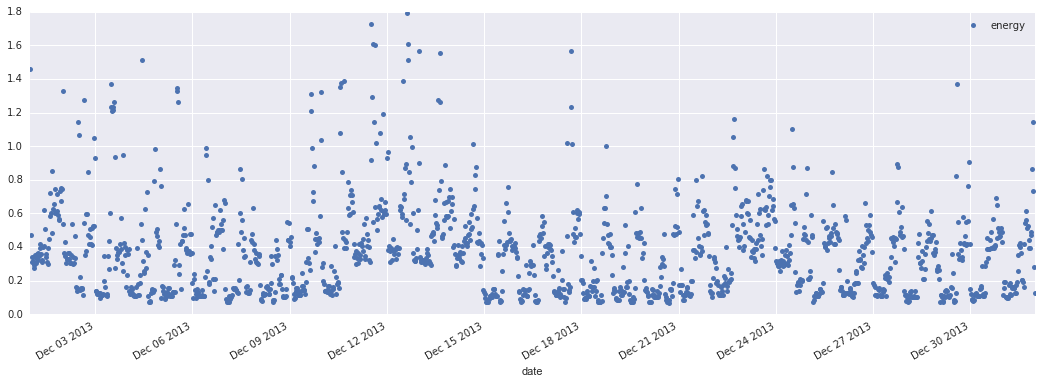

In [416]:
fig, ax = plt.subplots(figsize = (18,6))
ax = data.plot("date", "energy", style='o', ms=5, ax = ax)

In [417]:
# mean:
mean = np.mean(data1.energy)
# std
std = np.std(data1.energy)

In [418]:
print ("mean energy use by half an hour {:.2f}".format(mean))
print ("stdev energy use by half an hour  {:.2f}".format(std))
thresholds = [mean + 3 * std, mean - 3 *std]
print ("3-sigma thresholds upper limit is\n{:.2f} \nand the lower limit is \n{:.2f}\n".format(*thresholds))

mean energy use by half an hour 0.37
stdev energy use by half an hour  0.27
3-sigma thresholds upper limit is
1.17 
and the lower limit is 
-0.44



In [419]:
ind = np.where((data1.energy > thresholds[0])|(data1.energy < thresholds[1]))
ind

(array([   0,   48,   80,  119,  120,  121,  122,  123,  124,  165,  217,
         218,  219,  415,  416,  430,  459,  460,  465,  505,  506,  508,
         511,  523,  552,  558,  559,  560,  576,  604,  606,  607,  800,
         801, 1373]),)

In [420]:
ext = data1.iloc[ind]
ext

,date,energy
0,2013-12-01 00:00:00,1.461
48,2013-12-02 00:00:00,1.329
80,2013-12-02 16:00:00,1.273
119,2013-12-03 11:30:00,1.373
120,2013-12-03 12:00:00,1.234
121,2013-12-03 12:30:00,1.210
122,2013-12-03 13:00:00,1.218
123,2013-12-03 13:30:00,1.234
124,2013-12-03 14:00:00,1.263
165,2013-12-04 10:30:00,1.512


In [421]:
# n_clusters = 2

# for col in data1.columns:
#     kmeans = KMeans(n_clusters=n_clusters)
#     X = data[col].reshape(-1, 1)
#     kmeans.fit(X)
#     pred = kmeans.predict(X)
    
#     print "{}: {}".format(col, pred)

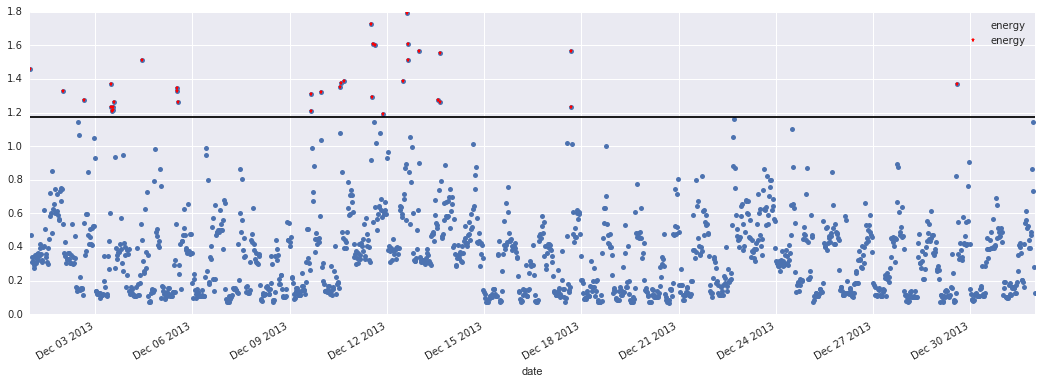

In [422]:
fig, ax = plt.subplots(figsize = (18,6))
ax = data.plot("date", "energy", style='o', ms=5, ax = ax)
ax = data1.iloc[ind].plot("date", "energy", style='*', color = "r", ms=5, ax = ax)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')

In [423]:
#data.energy = data.energy.apply(lambda x: str(x))

In [424]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [425]:
kmeans = KMeans(n_clusters= 1).fit(data2, data.date)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [426]:
model = KMeans

In [427]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


In [428]:
weather20 = pd.read_csv("weather 20 dec 2013.csv")
weather50 = pd.read_csv("weather 50 dec 2013.csv")
frames = [weather20, weather50]

In [429]:
weather = pd.concat(frames)

In [430]:
weather.head()

,Unnamed: 0,DateUTC<br />,Dew PointF,TemperatureF,Wind SpeedMPH
0,1,2013-12-01 00:20:00<br />,32.0,33.8,4.6
1,3,2013-12-01 01:20:00<br />,33.8,33.8,4.6
2,5,2013-12-01 02:20:00<br />,33.8,35.6,4.6
3,8,2013-12-01 03:20:00<br />,35.6,35.6,4.6
4,10,2013-12-01 04:20:00<br />,35.6,37.4,8.1


In [431]:
len(weather)

1488

In [432]:
weather["date"] = weather["DateUTC<br />"].apply(lambda x: x[:-6]) 

In [433]:
weather.date =  pd.to_datetime(weather.date)

In [434]:
weather.head()

,Unnamed: 0,DateUTC<br />,Dew PointF,TemperatureF,Wind SpeedMPH,date
0,1,2013-12-01 00:20:00<br />,32.0,33.8,4.6,2013-12-01 00:20:00
1,3,2013-12-01 01:20:00<br />,33.8,33.8,4.6,2013-12-01 01:20:00
2,5,2013-12-01 02:20:00<br />,33.8,35.6,4.6,2013-12-01 02:20:00
3,8,2013-12-01 03:20:00<br />,35.6,35.6,4.6,2013-12-01 03:20:00
4,10,2013-12-01 04:20:00<br />,35.6,37.4,8.1,2013-12-01 04:20:00


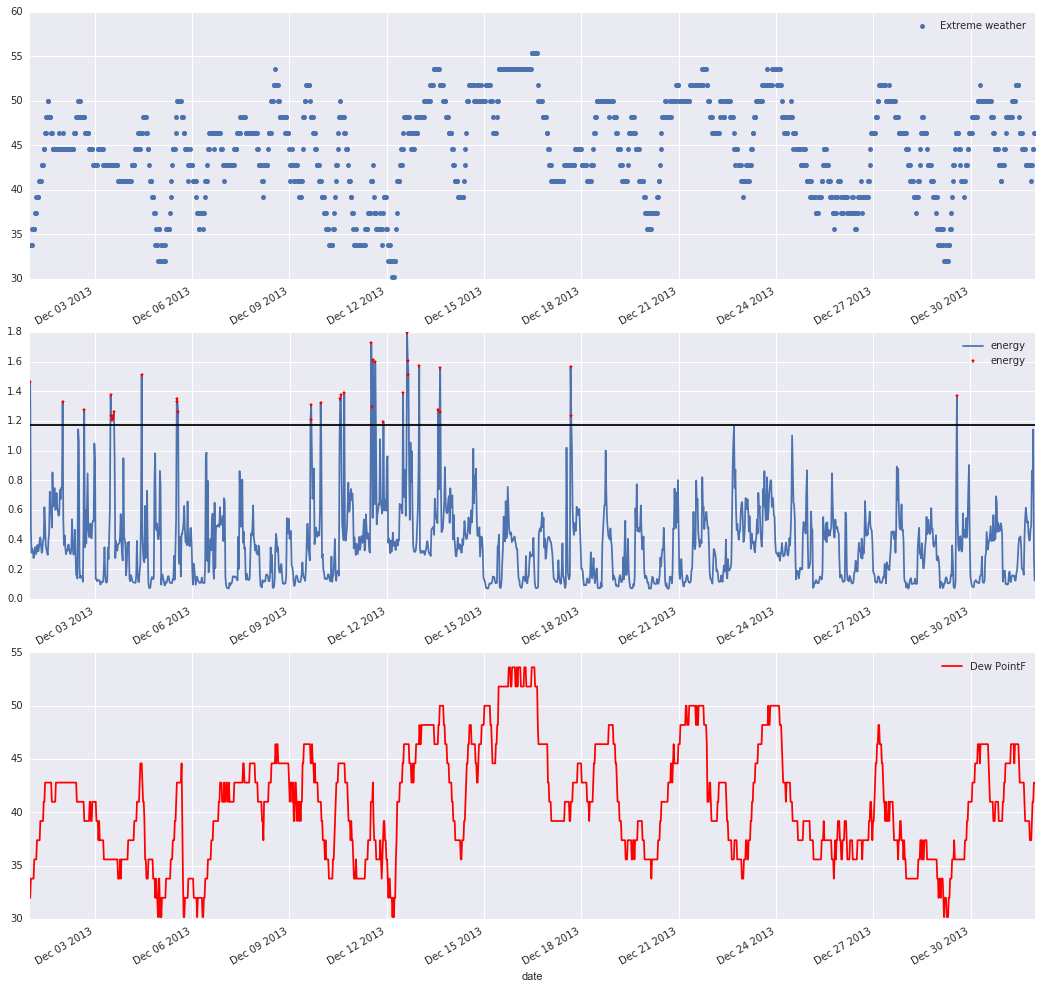

In [435]:
fig, ax = plt.subplots(3, 1, figsize = (18,18))
ax[0] = weather.plot("date", "TemperatureF", style='o', ms=5, label = "Extreme weather", ax = ax[0])
ax[2] = weather.plot("date", "Dew PointF", style='r-', ms=5, ax = ax[2])
ax[1] = data.plot("date", "energy", style='-', ms=5, ax = ax[1])
ax[1] = data1.iloc[ind].plot("date", "energy", style='*', color = "r", ms=5, ax = ax[1])
ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.legend()

In [436]:
tem = weather.TemperatureF

In [437]:
d = weather["Dew PointF"]

In [438]:
eng = data.energy

In [439]:
eng = eng[:-1]

[]

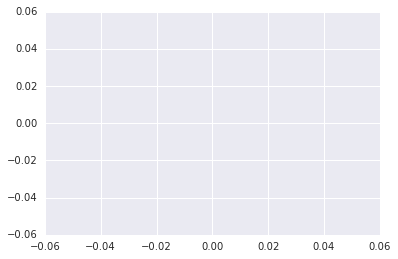

In [447]:
plt.plot(x = d, y = eng)

In [448]:
import scipy

In [449]:
scipy.stats.spearmanr(scale(tem), scale(eng))

SpearmanrResult(correlation=0.059497411803954826, pvalue=0.021722024524481246)

AttributeError: 'DataFrame' object has no attribute 'continent'

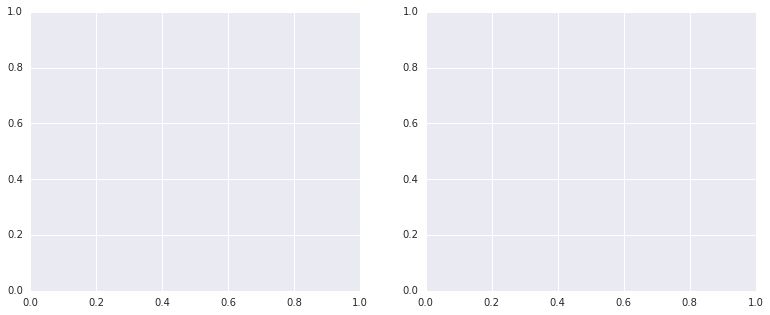

In [443]:
f, axes = plt.subplots(1,2, figsize = (13,5))
axes= sns.violinplot(x = data.continent, y = data.beer_servings)
#sns.boxplot(x = data.continent, y = data.beer_servings, ax = axes[1])

In [ ]:
f, axes = plt.subplots(1,2,figsize = (13,5),sharex=True,sharey=True)
sns.violinplot(x = data.continent, y = data.beer_servings, ax = axes[0])
sns.boxplot(x = data.continent, y = data.beer_servings, ax = axes[1])

In [ ]:
from sklearn.cluster import KMeans